In [2]:
from sklearn import metrics
import pandas as pd
import numpy as np

Modelos de clasificación

1.- Accuracy

2.- Precisión

3.- F1 

4.- Gráfica ROC (Receiving Operating Characteristic) con AUC (Area under the curve)


Modelos de regresión 

1.- Mean absolute error (MAE)

2.- Mean squared error (MSE)

3.- Root Mean squared error (RMSE)

4.- R^2




In [7]:
y_test=[1,1,0,1,0]

#posterioemenet a tu modelo
y_pred=[0,1,0,1,1]

metrics.accuracy_score(y_test,y_pred)

#esta metología se suele usar cuando tienes (aprox) la mitad +/1/V y la otra mitad -/0/F

0.2

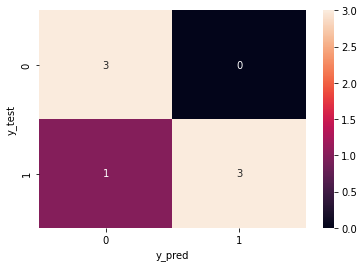

In [22]:
#precisión
import seaborn as sn
'''
        TP     
P=-------------
     TP+FP

TP: True Positive
FP: False Positive
'''

data={'y_test':[1,1,0,0,1,1,0],
      'y_pred':[1,1,0,0,1,0,0]
    
}

df=pd.DataFrame(data)

#matrix de confusión 

confusion_matrix=pd.crosstab(df['y_test'],df['y_pred'])
sn.heatmap(confusion_matrix,annot=True)


In [23]:
confusion_matrix[1][1]

pres=confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][1])
pres

0.5

In [35]:
# Sensitivity o recall
'''
           TP
Recall=-------------
         TP+FN

'''

Recall= confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1])
Recall

0.75

In [39]:
#F1: es una combinación entre la precisión y recall/sensitivity
'''
    2*P*R
F1=----------
     (P+R)
'''

F1=2*pres*Recall/(pres+Recall)
F1

0.6

In [40]:
import matplotlib.pyplot as plt


In [42]:
actual= [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
predictions = [0.1, 0.3, 0.2, 0.6, 0.9, 0.6, 0.7, 0.1, 0.8, 0.6, 0.2, 0.4]

FP_rate,TP_rate,tresholds  =metrics.roc_curve(actual,predictions)

In [44]:
roc_auc=metrics.auc(FP_rate, TP_rate)

Text(0.5, 1.0, 'ROC')

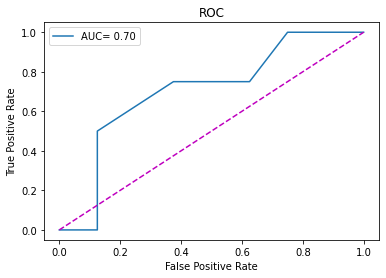

In [58]:
plt.plot(FP_rate, TP_rate,label='AUC= %0.2f' %roc_auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'m--')
plt.legend()
plt.title('ROC')

In [61]:
y_true = [0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
y_pred = [0, 1, 2, 1, 1, 2, 2, 1, 2, 0]

In [62]:
#opciones para clasificación multiclase
#promedio Macro: clacula la precisión para todas las clases de manera individual y luego las promedia
#promedio micro: calcula los verdaderos + y los falsos + para cada clase, y luego los promedia y calcula
#la presición
#precisión pesada, donde es igual que el macro, pero los pesa dependiendo la frecuencia las clases

metrics.precision_score(y_true,y_pred,average='macro')

0.8333333333333334

In [63]:
metrics.precision_score(y_true,y_pred,average='micro')

0.8

In [64]:
metrics.precision_score(y_true,y_pred,average='weighted')

0.85

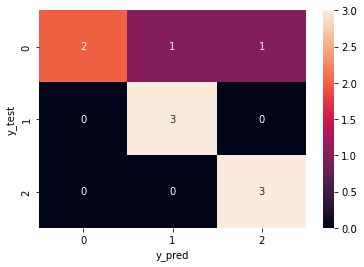

In [65]:
data={'y_test': [0, 1, 2, 0, 1, 2, 0, 1, 2, 0],
      'y_pred':[0, 1, 2, 1, 1, 2, 2, 1, 2, 0]
    
}

df=pd.DataFrame(data)

#matrix de confusión 

confusion_matrix=pd.crosstab(df['y_test'],df['y_pred'])
sn.heatmap(confusion_matrix,annot=True)